# Phase 4 Project

## Business Objective

To help Acme Online analyze customer tweets from their Twitter page about Apple and Google products. The result of this analysis will be used to find out which company's product or service is more popular - This will help Acme Online tweak their portfolio accordingly.

## Methodology

1. Analyze the tweets to see check what sort of emotion we can detect about a company's product/service. For eg: if we're talking about an iPad, we can analyze tweets about iPads to see if they're positive, negative or neutral. We can extraploate this to different product categories and gage sentiment of each.

2. We can analyze the tweets to see what customers are tweeting about i.e. are they tweeting more about Apple products/service or Google products/services? This can be used to gage semtiment of the brand itself i.e Apple and Google.



# Dataset

Dataset sourced from CrowdFlower via data.world: https://data.world/crowdflower/brands-and-product-emotions

# Analysis

In [13]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df= pd.read_csv('tweets.csv',encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Pre-processing

In [3]:
#renaming the columns to make it less cumbersome
df.rename(columns={'emotion_in_tweet_is_directed_at':'product_service',
                   'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'},inplace=True)
df.head()

,tweet_text,product_service,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
#getting some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_text       9092 non-null   object
 1   product_service  3291 non-null   object
 2   emotion          9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#checking for null values
df.isna().sum()

tweet_text            1
product_service    5802
emotion               0
dtype: int64

We can see that the `product_service` column has a large number of missing values; more than 50%

In [6]:
#examining the product_service column
df['product_service'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: product_service, dtype: int64

In [7]:
#let's group product/services that resemble each other for both brands. This will make for easier analysis

df['product_service'].replace('Other Google product or service','Google',inplace=True)
df['product_service'].replace('Other Apple product or service','Apple',inplace=True)
df['product_service'].replace('Android App','Android',inplace=True)

#checking
df['product_service'].value_counts()

iPad                  946
Google                723
Apple                 696
iPad or iPhone App    470
iPhone                297
Android               159
Name: product_service, dtype: int64

# Listing the emotion class for each product_service

This is to answer the first question : What are the emotional repsonses for each product_service category listed in the data? For eg: for the category 'Apple' how many positive,negative and neutral responses are there?

By comparing the responses for each category, we can gage customer sentiment

In [8]:
#creating a pivot table to organize the data

df_pivot = df.pivot_table(index='product_service',aggfunc='count',columns='emotion')
df_pivot

tweet_text                   \
emotion            I can't tell Negative emotion   
product_service                                    
Android                     NaN             16.0   
Apple                       2.0             97.0   
Google                      2.0            115.0   
iPad                        4.0            125.0   
iPad or iPhone App          NaN             63.0   
iPhone                      1.0            103.0   

                                                                        
emotion            No emotion toward brand or product Positive emotion  
product_service                                                         
Android                                           2.0            141.0  
Apple                                            22.0            575.0  
Google                                           24.0            582.0  
iPad                                             24.0            793.0  
iPad or iPhone App                               10.0            397.0  
iPhone                                            9.0            184.0

In [9]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Android to iPhone
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   (tweet_text, I can't tell)                        4 non-null      float64
 1   (tweet_text, Negative emotion)                    6 non-null      float64
 2   (tweet_text, No emotion toward brand or product)  6 non-null      float64
 3   (tweet_text, Positive emotion)                    6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


In [10]:
#renaming the columns
df_pivot.columns = ["I can't tell",'Negative emotion','No emotion toward brand or product', 'Positive emotion']
df_pivot

,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
product_service,,,,
Android,NaN,16.0,2.0,141.0
Apple,2.0,97.0,22.0,575.0
Google,2.0,115.0,24.0,582.0
iPad,4.0,125.0,24.0,793.0
iPad or iPhone App,NaN,63.0,10.0,397.0
iPhone,1.0,103.0,9.0,184.0


In [11]:
#rearranging the columns for better visualization
df_pivot=df_pivot[['Positive emotion','Negative emotion', 'No emotion toward brand or product', "I can't tell"]]

#sorting the values for better visuzalization
df_pivot.sort_values('Positive emotion',ascending=False,inplace=True)

df_pivot

,Positive emotion,Negative emotion,No emotion toward brand or product,I can't tell
product_service,,,,
iPad,793.0,125.0,24.0,4.0
Google,582.0,115.0,24.0,2.0
Apple,575.0,97.0,22.0,2.0
iPad or iPhone App,397.0,63.0,10.0,NaN
iPhone,184.0,103.0,9.0,1.0
Android,141.0,16.0,2.0,NaN


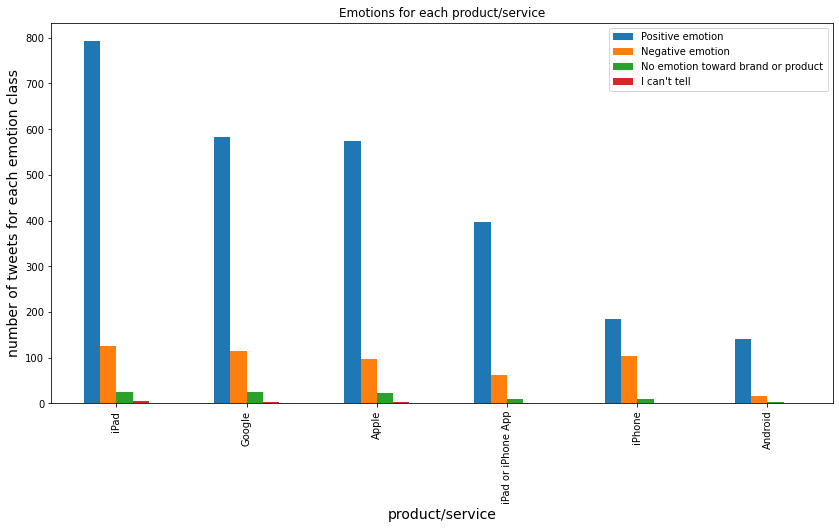

In [14]:
# bar chart listing emotion class for each product_service 

df_pivot.plot(kind='bar',figsize=(14,7));
plt.title('Emotions for each product/service');
plt.ylabel('number of tweets for each emotion class',fontsize=14);
plt.xlabel('product/service',fontsize=14);